**CLASIFICATION USING LOGISTIC REGRESSION**

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing classification dataset from preprocessing folder 
data = pd.read_excel('../preprocessing/classificationData.xlsx')

In [3]:
#drop out id column
data.drop(['id number'], axis=1, inplace=True)

In [4]:
#We define X and y
X = data.drop('Recurrence',axis=1)
y = data['Recurrence']
#rename X and y as features and target
features = X
target = y
#print shape of features and target
print(features.shape)
print(target.shape)

(198, 32)
(198,)


In [5]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
#print shape of train and test
print(X_train.shape)
print(X_test.shape)

(158, 32)
(40, 32)


<AxesSubplot: xlabel='Recurrence', ylabel='count'>

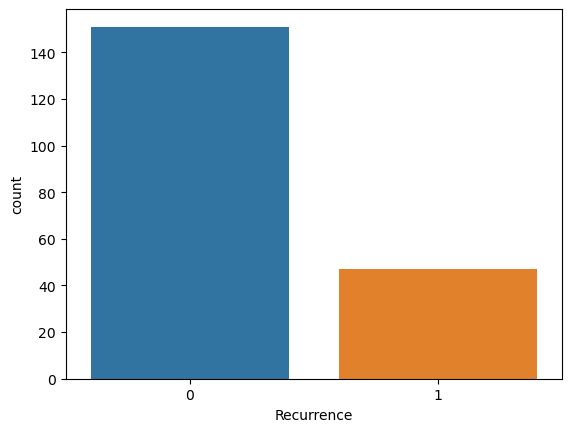

In [6]:
#save count plot of target variable before sampling
sns.countplot(x='Recurrence', data=data)

In [7]:
#perform adasyn sampling
from imblearn.over_sampling import ADASYN

ada =  ADASYN(sampling_strategy=0.5, n_neighbors=10)
X_train, y_train = ada.fit_resample(X_train, y_train)

<AxesSubplot: xlabel='Recurrence', ylabel='count'>

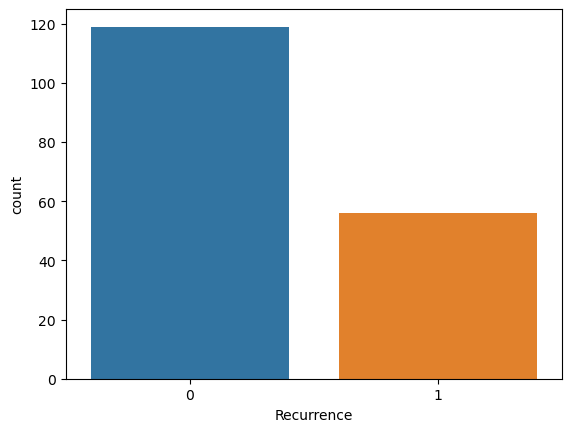

In [8]:
#save count plot of target variable after sampling
sns.countplot(x=y_train)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components="mle")

In [12]:
X_train = pca.fit_transform(X_train)

In [13]:
pca.explained_variance_ratio_

array([3.18835623e-01, 2.53023375e-01, 1.04690934e-01, 6.72206251e-02,
       4.52457103e-02, 4.25239138e-02, 3.72120023e-02, 2.71279848e-02,
       1.86511924e-02, 1.67832176e-02, 1.45172480e-02, 1.11980259e-02,
       9.61135955e-03, 7.82691379e-03, 5.76299174e-03, 4.00953580e-03,
       3.14628411e-03, 2.26990849e-03, 2.14014515e-03, 1.68895069e-03,
       1.28303607e-03, 1.08725389e-03, 9.08457138e-04, 8.02977841e-04,
       7.51541296e-04, 5.60929540e-04, 4.53596157e-04, 3.98618578e-04,
       1.63849521e-04, 6.65707130e-05, 2.84005943e-05])

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support

# F6 score to be used in cross validation

In [36]:
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
score = make_scorer(fbeta_score, beta=6, average="binary")

In [43]:
#find optimal value of hyperparameter C
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='newton-cg', penalty='l2', max_iter=100, class_weight='balanced')
parameters = {'C':np.linspace(300, 500, 8)}

cv = GridSearchCV(logmodel,parameters,cv=10, scoring=score)
cv_fit =cv.fit(X_train, y_train)

#print best estimator
best_clf = cv_fit.best_estimator_

In [44]:
cv.best_score_

0.7429762596188554

In [45]:
cv.best_params_

{'C': 300.0}

In [46]:
cv.score(X_train, y_train)

0.8868648130393098

In [47]:
cv.score(pca.transform(scaler.transform(X_test)), y_test)

0.4884488448844885

In [48]:
precision_recall_fscore_support(y_test, cv.predict(pca.transform(scaler.transform(X_test))), beta=6, average="binary")

(0.26666666666666666, 0.5, 0.4884488448844885, None)

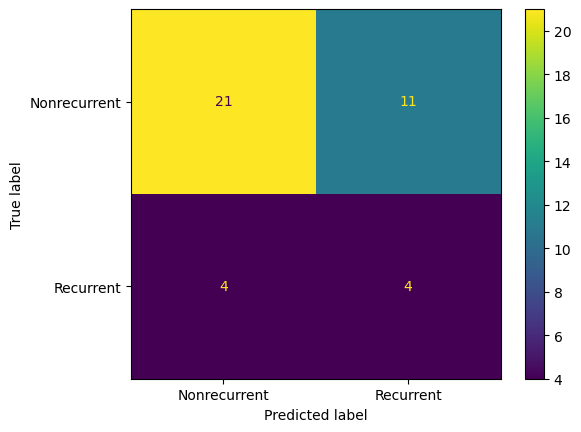

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, cv.predict(pca.transform(scaler.transform(X_test))), display_labels=["Nonrecurrent", "Recurrent"])
plt.savefig("confusionMatrix1.png", dpi=300)

In [49]:
#find optimal value of hyperparameter C
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='newton-cg', penalty='l2', max_iter=100, class_weight='balanced')
parameters = {'C':np.linspace(300, 500, 8)}

cv = GridSearchCV(logmodel,parameters,cv=10)
cv_fit =cv.fit(X_train, y_train)

#print best estimator
best_clf = cv_fit.best_estimator_

In [50]:
cv.best_score_

0.7486928104575163

In [51]:
cv.best_params_

{'C': 300.0}

In [52]:
cv.score(X_train, y_train)

0.8514285714285714

In [53]:
cv.score(pca.transform(scaler.transform(X_test)), y_test)

0.625

In [54]:
precision_recall_fscore_support(y_test, cv.predict(pca.transform(scaler.transform(X_test))), beta=6, average="binary")

(0.26666666666666666, 0.5, 0.4884488448844885, None)

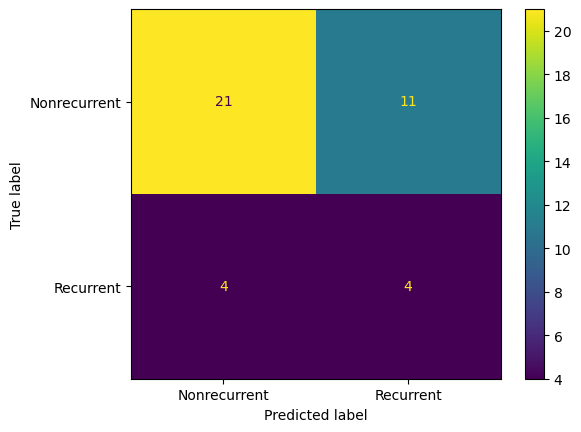

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, cv.predict(pca.transform(scaler.transform(X_test))), display_labels=["Nonrecurrent", "Recurrent"])
plt.savefig("confusionMatrix2.png", dpi=300)